In [1]:
!pip install -U scipy==1.2.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user


In [1]:
!pip install imread

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.2 MB/s eta 0:00:00


In [2]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
from textblob import TextBlob
from requests import get
from time import sleep
from random import randint
from warnings import warn
import matplotlib.pyplot as plt

In [3]:

pages = np.arange(1, 20, 50) 
headers = {'Accept-Language': 'en-US,en;q=0.8'} # If this is not specified, the default language is Mandarin

In [4]:
#initialize empty lists to store the variables scraped
titles = []
years = []
#ratings = []
genres = []
runtimes = []
imdb_ratings = []
imdb_ratings_standardized = []
metascores = []
votes = []

In [5]:
for page in pages:
    
    #get request
    response = get("https://www.imdb.com/search/title?genres=sci-fi&" 
                   + "start=" 
                   + str(page) 
                   + "&explore=title_type,genres&ref_=adv_prv")
    
    sleep(randint(8,15))
     
    #throw warning for status codes that are not 200
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))

    #parse the content of current iteration of request
    page_html = BeautifulSoup(response.text, 'html.parser')
        
    movie_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')
    
    #extract the 50 movies for that page
    for container in movie_containers:

        #conditional for all with metascore
        if container.find('div', class_ = 'ratings-metascore') is not None:

            #title
            title = container.h3.a.text
            titles.append(title)

            #year released
            year = container.h3.find('span', class_= 'lister-item-year text-muted unbold').text
            years.append(year)
            #rating
            #rating = container.p.find('span', class_= 'certificate').text
            #ratings.append(rating)

            #genre
            genre = container.p.find('span', class_ = 'genre').text
            genres.append(genre)

            #runtime
            time = container.p.find('span', class_ = 'runtime').text
            runtimes.append(time)

            #IMDB ratings
            imdb = float(container.strong.text)
            imdb_ratings.append(imdb)

            #Metascore
            m_score = container.find('span', class_ = 'metascore').text
            metascores.append(int(m_score))

            #Number of votes
            vote = container.find('span', attrs = {'name':'nv'})['data-value']
            votes.append(int(vote))

In [6]:
sci_fi_df = pd.DataFrame({'movie': titles,
                      'year': years,
                      'genre': genres,
                      'runtime_min': runtimes,
                      'imdb': imdb_ratings,
                      'metascore': metascores,
                      'votes': votes}
                      )

sci_fi_df.loc[:, 'year'] = sci_fi_df['year'].str[-5:-1] # two more data transformations after scraping
# Drop 'ovie' bug
# Make year an int
sci_fi_df['n_imdb'] = sci_fi_df['imdb'] * 10
final_df = sci_fi_df.loc[sci_fi_df['year'] != 'ovie'] # One small issue with the scrape on these two movies so just dropping those ones.
final_df.loc[:, 'year'] = pd.to_numeric(final_df['year'])

In [7]:
sci_fi_df

,movie,year,genre,runtime_min,imdb,metascore,votes,n_imdb
0,Avatar: The Way of Water,2022,"\nAction, Adventure, Fantasy",192 min,7.8,67,278147,78.0
1,Everything Everywhere All at Once,2022,"\nAction, Adventure, Comedy",139 min,8.0,81,313644,80.0
2,M3GAN,2022,"\nHorror, Sci-Fi, Thriller",102 min,6.4,72,50309,64.0
3,Infinity Pool,2023,"\nCrime, Horror, Mystery",117 min,6.8,72,3115,68.0
4,Jung_E,2023,"\nAction, Adventure, Drama",98 min,5.4,52,6379,54.0
5,Avatar,2009,"\nAction, Adventure, Fantasy",162 min,7.9,83,1316800,79.0
6,The Wandering Earth II,2023,"\nAction, Adventure, Drama",173 min,8.0,56,5573,80.0
7,Black Panther: Wakanda Forever,2022,"\nAction, Adventure, Drama",161 min,7.0,67,163803,70.0
8,Vesper,2022,"\nAdventure, Drama, Sci-Fi",114 min,5.9,70,14609,59.0
9,Black Adam,2022,"\nAction, Adventure, Fantasy",125 min,6.4,41,217878,64.0


# Scraping Reviews

In [8]:
page = requests.get("https://www.imdb.com/title/tt0120616/reviews/?ref_=tt_ov_rt")
soup = BeautifulSoup(page.content, "html.parser")
rev = soup.findAll('div', class_='text show-more__control')
movies = []
for movie in rev:
    movies.append(movie.text)
df3 = pd.DataFrame()
df3['reviews']=movies

In [9]:
dict = {'reviews':["This movie is awful. Just plain awful. The acting is ludicrous. Which leads us to the disgracefull casting. Of course the best casting in the world couldn't save the script. The effects were nice, and had the potential to be horrifying. But this movie could never figure out what it wanted to be. Were they trying to take themselves seriously? In some parts, yes. In others, no. Was this supposed to be horror? adventure? camp/comedy?","I normally don't write these reviews but I was noticing a lot of fairly flattering ones for The Mummy on this site and I thought I should let a few of you know the truth about this movie. It was really very bad. Yes, the acting was lousy, but I could look past that if the film had some other redeeming quality. Sadly, it did not. You should not be able to look at all of the characters in scene one and be able to accurately predict who is going to die and when it will happen.","I was really disappointed with this movie because I had pretty high expectations. The trailer was pretty exciting, but it turned out that all the good stuff in this movie was in the trailer. The movie tried both to be spooky and funny but failed on both accounts. The mummy was stupid and the main characters were boring stereotypes, the female lead was especially annoying. The script is very bad and the direction is not good either. This movie is a huge backwards step from Sommers last movie, Deep Sea Rising which was much better.","This movie is just a shame. Nothing about it is even remotely entertaining. It's not scary, and it's not even campy enough to be funny in an Anaconda-esque way. The writing and directing are fit for a straight-to-video flick, yet for some reason millions of dollars were fed to this loser. Somehow, even the expensive sets, costumes and ILM computer effects seem low-rent. So what killed this flick? Maybe it's the characters, one of whom knows how to read heiroglyphics, studies ancient Egyptian cities, memorizes mummy's curses, but has never heard of Pharoah Seti I.","The Mummy is one of the worst movies I´ve seen this year. I guess it is meant to be a mixture of Indiana Jones and old-school horror movies with more special effects, but it doesn´t even come close to Quatermain. Bad actors, poor dialogues and a mummy that moves like Terminator. I only rated it a 2 because of the first ten minutes.","Quite possibly one of the poorest movies I have ever seen and I have seen quite a few in my time","an embarrassing slapstick style rip-off of the Indiana Jones movies. It's not funny (though it thinks it is), it's not exciting, it's not dramatic, it's just willfully stupid.","The first few minutes were enticing; exotic costumes, language, and sets weaved nicely together to create a plausibly depicted ancient Egypt. But then *flash!* Three thousand years later...We're treated to shameless silliness as a bunch of slapstick, clever-line-dropping, cut-from-movie-dough characters annoy us through a cartoonish exploration of an ancient city and the accidental awakening of an (ooh) fearsome mummy.", 'i did not like the scenario','the director should have put more effort','i did not like the way the story ended','very poor acting from the hero','This film has got to be the epitome of terrible writing and should be a classroom example of what not to do when writing a screenplay. Why would Joshua take on (clearly) amateur writer Adam Gaines script is beyond me. Even his good directing and excellent cinematography could not save this disaster.',"The guy still used a cheap, out-dated film camera took pictures? Still got dark room with red light to develop his films? Wow, if the story background is in the 80', I might buy the whole story more willingly. As to the storyline itself, that guy just took pictures randomly in the street, and he randomly took a picture of a woman in the park, then went home to develop what he took that day.","I watch a lot of movies and I like to give them all a chance just in case there is something interesting or exciting to warrant a viewing Unfortunately this movie has none of these features it is pointless and offers nothing in the way of story line,acting or direction The plot is non-existent with the actors just going through the motions and the dialogue is sooo boring its embarrassing. I wish the previous reviewers had posted earlier as this would have saved me 95 mins of my time","I rarely stop watching a movie although how crappy it is. Well for this one I made an exception since its beyond boring. I cant leave long reviews so this is it.. SKIP IT","Give me back my 1.5 hour? Bad in everything. 3 stars for me ( courtesy )","Boring and predictable","Bad bad story line. Bad acting. The mood is doll and boring. Really dont do this again...i sincerly hope the writer/director can find other work, and a hint dont put this on your CV."]
       }
df2 = pd.DataFrame(dict)
#display(df2)
df_subset = pd.concat([df3, df2], ignore_index = True)
df_subset.reset_index()
df_subset



,reviews
0,Certainly this Universal remake is more in the...
1,"""The Mummy"" is an adventurous yarn in the vein..."
2,Rick O'Connell (Brendan Frazer) leads the beau...
3,"In the 1990's, a stream of remakes came out af..."
4,"Here, the makers took the original stock horro..."
5,It seems like a long time ago when this came o...
6,"First off, everyone is entitled to their own o..."
7,The Mummy is a great summer adventure for nons...
8,To remake The Mummy in the style of Indiana Jo...
9,A real romp of an adventure/horror genre with ...


In [10]:
df_subset.duplicated().sum()

0

In [11]:
all_text = " ".join(df_subset["reviews"])

In [12]:
all_text

'Certainly this Universal remake is more in the vain of Indiana Jones rather than the original Mummy.  It is high on adventure and comedy, and wins because of it.  The sets, scenery, special effects are all first-rate.  The film is fast-paced from beginning to end and is very suspenseful.  Stephen Sommers again shows his talent as a director for creating action-packed adventure with a high level of comedic overtones.  The cast are all very good in their roles, yet none of them seem really to be taking themselves or the film too serious.  Brendan Fraser is an affable hero, and Rachel Weisz makes a good heroine.  Good support comes from John Hannah, Kevin J. O\'Connor, and the mummy, Arnold Vosloo.  Also a real treat was seeing Bernard Fox in a small role as an aging British pilot.  Don\'t expect the old mummy of lore in this one, but sit down and have one heck of a ride...a rollercoaster of hijinks in the sands of Egypt. "The Mummy" is an adventurous yarn in the vein of "Indiana Jones."

In [13]:
chars = sorted(list(set(all_text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 !"$&'()*,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXY`abcdefghijklmnopqrstuvwxyz´é–
81


In [14]:
df_new = df_subset.copy()

In [15]:
import re
import string

In [16]:
def cleaning_text(text):
 text = text.lower()
 text = re.sub('\[.*?\]', '', text)
 text = re.sub('https?://\S+|www\.\S+', '', text)
 text = re.sub('<.*?>+', '', text)
 text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
 text = re.sub('[‘’“”…]', '', text)
 return text
cleaning = lambda x: cleaning_text(x)

In [17]:
df_new['Cleaned_Reviews'] = df_new.reviews.apply(cleaning)

In [18]:
df_new

,reviews,Cleaned_Reviews
0,Certainly this Universal remake is more in the...,certainly this universal remake is more in the...
1,"""The Mummy"" is an adventurous yarn in the vein...",the mummy is an adventurous yarn in the vein o...
2,Rick O'Connell (Brendan Frazer) leads the beau...,rick oconnell brendan frazer leads the beautif...
3,"In the 1990's, a stream of remakes came out af...",in the 1990s a stream of remakes came out afte...
4,"Here, the makers took the original stock horro...",here the makers took the original stock horror...
5,It seems like a long time ago when this came o...,it seems like a long time ago when this came o...
6,"First off, everyone is entitled to their own o...",first off everyone is entitled to their own op...
7,The Mummy is a great summer adventure for nons...,the mummy is a great summer adventure for nons...
8,To remake The Mummy in the style of Indiana Jo...,to remake the mummy in the style of indiana jo...
9,A real romp of an adventure/horror genre with ...,a real romp of an adventurehorror genre with a...


In [19]:
clean_total = " ".join(df_new["Cleaned_Reviews"])
chars = sorted(list(set(clean_total)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 0123456789abcdefghijklmnopqrstuvwxyz´é–
40


In [20]:
df_new = df_new[df_new['Cleaned_Reviews']!='']


In [21]:
df_new


,reviews,Cleaned_Reviews
0,Certainly this Universal remake is more in the...,certainly this universal remake is more in the...
1,"""The Mummy"" is an adventurous yarn in the vein...",the mummy is an adventurous yarn in the vein o...
2,Rick O'Connell (Brendan Frazer) leads the beau...,rick oconnell brendan frazer leads the beautif...
3,"In the 1990's, a stream of remakes came out af...",in the 1990s a stream of remakes came out afte...
4,"Here, the makers took the original stock horro...",here the makers took the original stock horror...
5,It seems like a long time ago when this came o...,it seems like a long time ago when this came o...
6,"First off, everyone is entitled to their own o...",first off everyone is entitled to their own op...
7,The Mummy is a great summer adventure for nons...,the mummy is a great summer adventure for nons...
8,To remake The Mummy in the style of Indiana Jo...,to remake the mummy in the style of indiana jo...
9,A real romp of an adventure/horror genre with ...,a real romp of an adventurehorror genre with a...


In [22]:
from textblob import TextBlob


In [23]:
df_new['Cleaned_Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0    certainly this universal make is more in the v...
1    the mummy is an adventurous yarn in the vein o...
2    rich cornell brandon fraser leads the beautifu...
3    in the 1990s a stream of remarked came out aft...
4    here the makers took the original stock horror...
5    it seems like a long time ago when this came o...
6    first off everyone is entitled to their own op...
7    the mummy is a great summer adventure for nons...
8    to make the mummy in the style of indiana jone...
9    a real rome of an adventurehorror gene with a ...
Name: Cleaned_Reviews, dtype: object

In [24]:
df_new

,reviews,Cleaned_Reviews
0,Certainly this Universal remake is more in the...,certainly this universal remake is more in the...
1,"""The Mummy"" is an adventurous yarn in the vein...",the mummy is an adventurous yarn in the vein o...
2,Rick O'Connell (Brendan Frazer) leads the beau...,rick oconnell brendan frazer leads the beautif...
3,"In the 1990's, a stream of remakes came out af...",in the 1990s a stream of remakes came out afte...
4,"Here, the makers took the original stock horro...",here the makers took the original stock horror...
5,It seems like a long time ago when this came o...,it seems like a long time ago when this came o...
6,"First off, everyone is entitled to their own o...",first off everyone is entitled to their own op...
7,The Mummy is a great summer adventure for nons...,the mummy is a great summer adventure for nons...
8,To remake The Mummy in the style of Indiana Jo...,to remake the mummy in the style of indiana jo...
9,A real romp of an adventure/horror genre with ...,a real romp of an adventurehorror genre with a...


In [25]:
df_new.duplicated().sum()

0

In [26]:
df_new['Cleaned_Reviews'].duplicated().sum()

0

In [27]:
freq = pd.Series(' '.join(df_new['Cleaned_Reviews']).split()).value_counts()[:10]


In [28]:
freq

the     563
and     252
of      248
a       219
is      217
to      173
in      137
this    117
it      110
i       102
dtype: int64

the basic list of data + models with nltk.download("popular")

In [29]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [30]:
from nltk.corpus import stopwords
stop = stopwords.words('english')


In [31]:
df_new['Cleaned_Reviews'] = df_new['Cleaned_Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in (stop)))



In [32]:
df_new

,reviews,Cleaned_Reviews
0,Certainly this Universal remake is more in the...,certainly universal remake vain indiana jones ...
1,"""The Mummy"" is an adventurous yarn in the vein...",mummy adventurous yarn vein indiana jones lot ...
2,Rick O'Connell (Brendan Frazer) leads the beau...,rick oconnell brendan frazer leads beautiful e...
3,"In the 1990's, a stream of remakes came out af...",1990s stream remakes came universal horror fil...
4,"Here, the makers took the original stock horro...",makers took original stock horror film turned ...
5,It seems like a long time ago when this came o...,seems like long time ago came remember first d...
6,"First off, everyone is entitled to their own o...",first everyone entitled opinions low ratings s...
7,The Mummy is a great summer adventure for nons...,mummy great summer adventure nonstop thrills k...
8,To remake The Mummy in the style of Indiana Jo...,remake mummy style indiana jones humorous edge...
9,A real romp of an adventure/horror genre with ...,real romp adventurehorror genre wonderful aest...


In [33]:
TextBlob(df_new['Cleaned_Reviews'][4]).ngrams(1)

[WordList(['makers']),
 WordList(['took']),
 WordList(['original']),
 WordList(['stock']),
 WordList(['horror']),
 WordList(['film']),
 WordList(['turned']),
 WordList(['indianajonesesque']),
 WordList(['adventure']),
 WordList(['tradition']),
 WordList(['raiders']),
 WordList(['lost']),
 WordList(['ark']),
 WordList(['visually']),
 WordList(['rich']),
 WordList(['part']),
 WordList(['film']),
 WordList(['opening']),
 WordList(['scenes']),
 WordList(['set']),
 WordList(['ancient']),
 WordList(['egypt']),
 WordList(['would']),
 WordList(['love']),
 WordList(['see']),
 WordList(['entire']),
 WordList(['film']),
 WordList(['built']),
 WordList(['around']),
 WordList(['sets']),
 WordList(['costumes']),
 WordList(['brilliantespecially']),
 WordList(['tantalizing']),
 WordList(['strictly']),
 WordList(['paintedon']),
 WordList(['attire']),
 WordList(['patricia']),
 WordList(['velazquez']),
 WordList(['ancksunamum']),
 WordList(['stunning']),
 WordList(['visual']),
 WordList(['completely']),


In [34]:
TextBlob(df_new['Cleaned_Reviews'][2]).ngrams(2)

[WordList(['rick', 'oconnell']),
 WordList(['oconnell', 'brendan']),
 WordList(['brendan', 'frazer']),
 WordList(['frazer', 'leads']),
 WordList(['leads', 'beautiful']),
 WordList(['beautiful', 'evelyn']),
 WordList(['evelyn', 'carnahan']),
 WordList(['carnahan', 'rachel']),
 WordList(['rachel', 'weisz']),
 WordList(['weisz', 'hamunaptra']),
 WordList(['hamunaptra', 'city']),
 WordList(['city', 'dead']),
 WordList(['dead', 'reading']),
 WordList(['reading', 'book']),
 WordList(['book', 'brings']),
 WordList(['brings', 'imhotep']),
 WordList(['imhotep', 'pharaoh']),
 WordList(['pharaoh', 'seti']),
 WordList(['seti', 'high']),
 WordList(['high', 'priest']),
 WordList(['priest', 'back']),
 WordList(['back', 'lifeonce']),
 WordList(['lifeonce', 'revived']),
 WordList(['revived', 'imhotep']),
 WordList(['imhotep', 'one']),
 WordList(['one', 'purpose']),
 WordList(['purpose', 'world']),
 WordList(['world', 'bring']),
 WordList(['bring', 'love']),
 WordList(['love', 'anck']),
 WordList(['anck

In [35]:
frequency = pd.Series(' '.join(df_new['Cleaned_Reviews']).split()).value_counts()[:20] 


In [36]:
frequency

mummy        80
movie        74
film         72
fun          40
fraser       38
good         31
one          31
weisz        27
like         26
brendan      25
well         25
action       25
really       24
rachel       24
also         24
great        23
effects      22
adventure    22
indiana      22
story        22
dtype: int64

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)
doc_vec = vectorizer.fit_transform(df_new["Cleaned_Reviews"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
df1 = pd.DataFrame(denselist, columns = names_features)


In [39]:
df1

,1015,1932,1999,30s40s,able,act,acting,action,actionadventure,actor,...,wrong,yarn,year,years,yes,youd,youll,younger,youre,yousommers
0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056268,...,0.059671,0.076772,0.000000,0.053391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094514,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051566,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060912,0.000000,0.079097,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.13621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153760,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.00000,0.000000,0.000000,0.000000,0.053015,0.060145,0.000000,0.081653,0.056221,0.053015,...,0.000000,0.000000,0.000000,0.000000,0.091771,0.000000,0.000000,0.072333,0.060145,0.000000
7,0.00000,0.000000,0.087247,0.000000,0.000000,0.000000,0.000000,0.000000,0.092523,0.000000,...,0.092523,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094052,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n2_words(corpus, n=None):
 vec1 = CountVectorizer(ngram_range=(2,2), 
 max_features=2000).fit(corpus)
 bag_of_words = vec1.transform(corpus)
 sum_words = bag_of_words.sum(axis=0)
 words_freq = [(word, sum_words[0, idx]) for word, idx in
 vec1.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1],
 reverse=True)
 return words_freq[:n]

In [43]:
top2_words = get_top_n2_words(df_new["Cleaned_Reviews"], n=200)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,brendan fraser,22
1,rachel weisz,21
2,indiana jones,20
3,special effects,14
4,john hannah,14


[Text(0, 0, 'brendan fraser'),
 Text(0, 0, 'rachel weisz'),
 Text(0, 0, 'indiana jones'),
 Text(0, 0, 'special effects'),
 Text(0, 0, 'john hannah'),
 Text(0, 0, 'arnold vosloo'),
 Text(0, 0, 'rick oconnell'),
 Text(0, 0, 'stephen sommers'),
 Text(0, 0, 'raiders lost'),
 Text(0, 0, 'lost ark'),
 Text(0, 0, 'jerry goldsmith'),
 Text(0, 0, 'kevin oconnor'),
 Text(0, 0, 'high priest'),
 Text(0, 0, 'brother jonathan'),
 Text(0, 0, 'oconnell brendan'),
 Text(0, 0, 'weisz john'),
 Text(0, 0, 'mummy great'),
 Text(0, 0, 'evelyn carnahan'),
 Text(0, 0, 'ancient egypt'),
 Text(0, 0, 'oded fehr')]

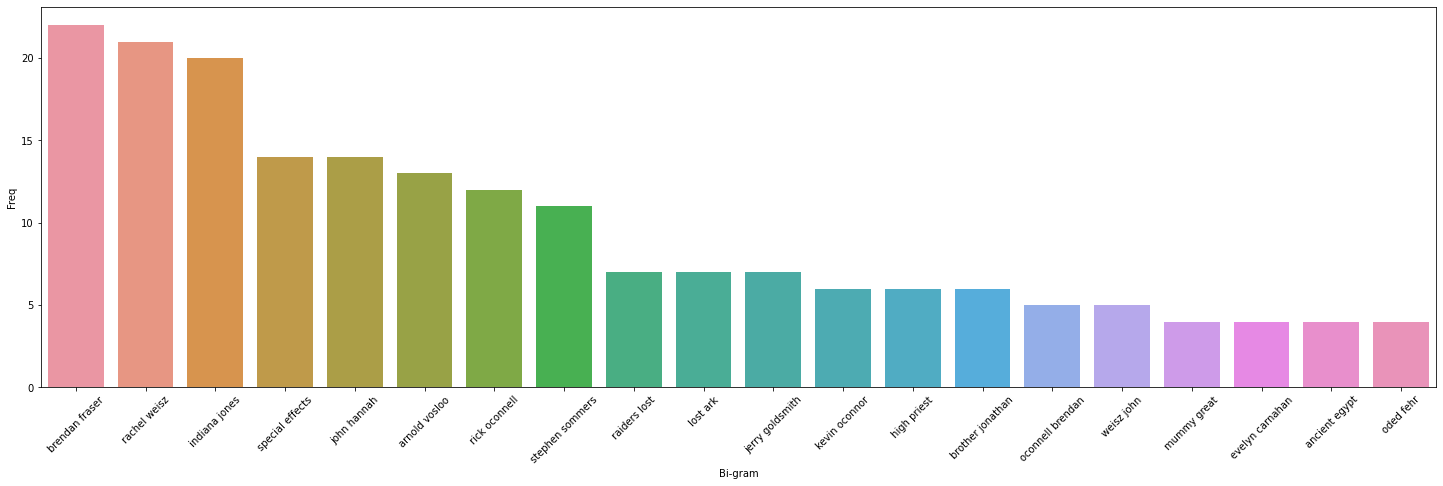

In [45]:
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (25, 7))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [47]:
string_total = " ".join(df_new["Cleaned_Reviews"])
string_total[:2000]

'certainly universal remake vain indiana jones rather original mummy high adventure comedy wins sets scenery special effects firstrate film fastpaced beginning end suspenseful stephen sommers shows talent director creating actionpacked adventure high level comedic overtones cast good roles yet none seem really taking film serious brendan fraser affable hero rachel weisz makes good heroine good support comes john hannah kevin j oconnor mummy arnold vosloo also real treat seeing bernard fox small role aging british pilot dont expect old mummy lore one sit one heck ridea rollercoaster hijinks sands egypt mummy adventurous yarn vein indiana jones lot fun charming never tries entertaining summer flick worth seeing perhaps even owning one fun movies return never grow tired soits hardly remake universal classic name merely new way tell story basic idea murderous mummy brought back dead time hero heroine must stop takes world something along line world dominationthe hero rick brendan fraser th

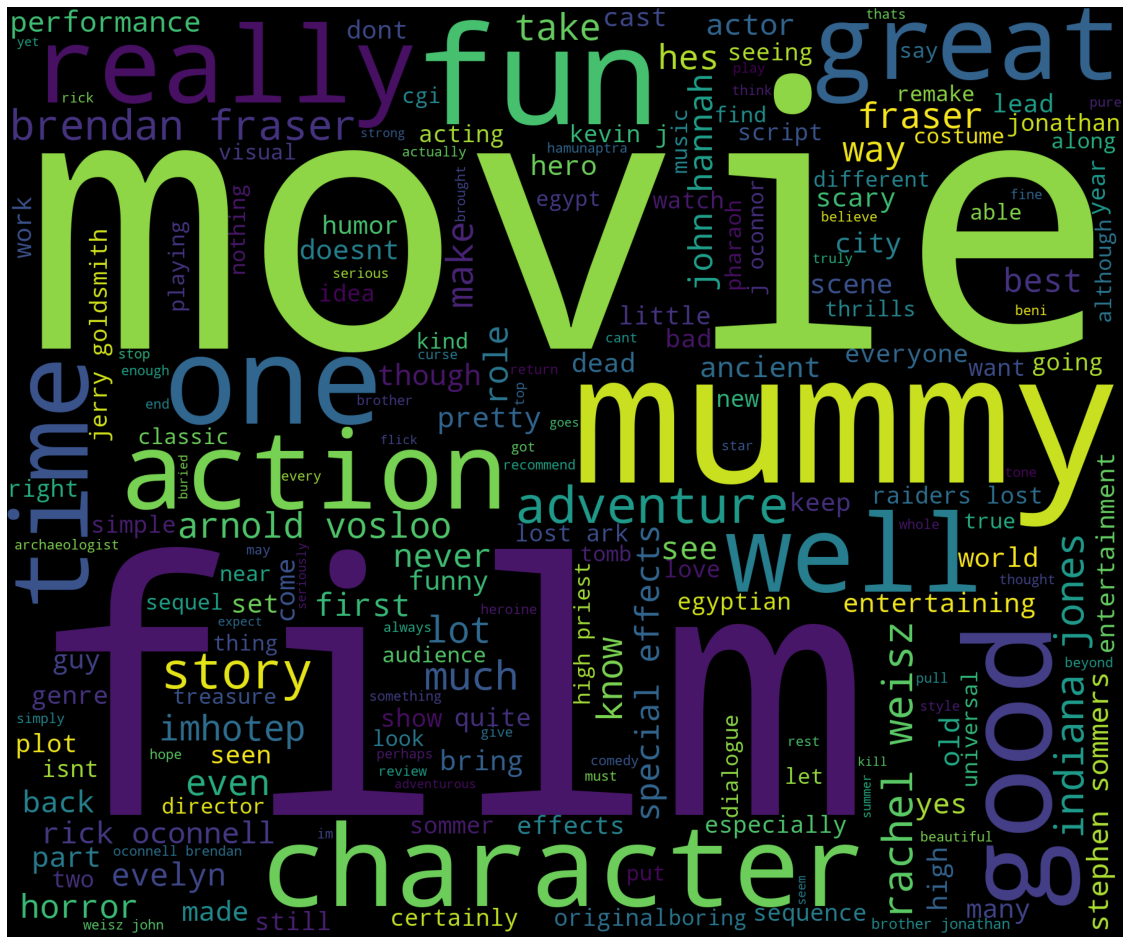

In [48]:
from wordcloud import WordCloud
wordcloud_generator = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_total)
fig = plt.figure(figsize = (20,20))
plt.imshow(wordcloud_generator)
plt.axis('off')
plt.show()


# VADER lexicon
NLTK provides a simple rule-based model for general sentiment analysis called VADER, which stands for “Valence Aware Dictionary and Sentiment Reasoner” (Hutto & Gilbert, 2014).

In [49]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [50]:
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [51]:
df_new['polarity'] = df_new["Cleaned_Reviews"].apply(lambda x: analyzer.polarity_scores(x))
df_new.tail(5)

,reviews,Cleaned_Reviews,polarity
39,I watch a lot of movies and I like to give the...,watch lot movies like give chance case somethi...,"{'neg': 0.13, 'neu': 0.587, 'pos': 0.283, 'com..."
40,I rarely stop watching a movie although how cr...,rarely stop watching movie although crappy wel...,"{'neg': 0.245, 'neu': 0.541, 'pos': 0.214, 'co..."
41,Give me back my 1.5 hour? Bad in everything. 3...,give back 15 hour bad everything 3 stars courtesy,"{'neg': 0.292, 'neu': 0.5, 'pos': 0.208, 'comp..."
42,Boring and predictable,boring predictable,"{'neg': 0.697, 'neu': 0.303, 'pos': 0.0, 'comp..."
43,Bad bad story line. Bad acting. The mood is do...,bad bad story line bad acting mood doll boring...,"{'neg': 0.487, 'neu': 0.513, 'pos': 0.0, 'comp..."


In [52]:
# Change data structure
df_new = pd.concat(
    [df_new.drop(['reviews'], axis=1), 
     df_new['polarity'].apply(pd.Series)], axis=1)
df_new.head(5)

,Cleaned_Reviews,polarity,neg,neu,pos,compound
0,certainly universal remake vain indiana jones ...,"{'neg': 0.036, 'neu': 0.575, 'pos': 0.389, 'co...",0.036,0.575,0.389,0.9905
1,mummy adventurous yarn vein indiana jones lot ...,"{'neg': 0.131, 'neu': 0.581, 'pos': 0.288, 'co...",0.131,0.581,0.288,0.9954
2,rick oconnell brendan frazer leads beautiful e...,"{'neg': 0.195, 'neu': 0.518, 'pos': 0.287, 'co...",0.195,0.518,0.287,0.8271
3,1990s stream remakes came universal horror fil...,"{'neg': 0.172, 'neu': 0.538, 'pos': 0.29, 'com...",0.172,0.538,0.290,0.9902
4,makers took original stock horror film turned ...,"{'neg': 0.05, 'neu': 0.657, 'pos': 0.293, 'com...",0.050,0.657,0.293,0.9932


In [53]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df_new['sentiment'] = df_new['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df_new.head(5)

,Cleaned_Reviews,polarity,neg,neu,pos,compound,sentiment
0,certainly universal remake vain indiana jones ...,"{'neg': 0.036, 'neu': 0.575, 'pos': 0.389, 'co...",0.036,0.575,0.389,0.9905,positive
1,mummy adventurous yarn vein indiana jones lot ...,"{'neg': 0.131, 'neu': 0.581, 'pos': 0.288, 'co...",0.131,0.581,0.288,0.9954,positive
2,rick oconnell brendan frazer leads beautiful e...,"{'neg': 0.195, 'neu': 0.518, 'pos': 0.287, 'co...",0.195,0.518,0.287,0.8271,positive
3,1990s stream remakes came universal horror fil...,"{'neg': 0.172, 'neu': 0.538, 'pos': 0.29, 'com...",0.172,0.538,0.290,0.9902,positive
4,makers took original stock horror film turned ...,"{'neg': 0.05, 'neu': 0.657, 'pos': 0.293, 'com...",0.050,0.657,0.293,0.9932,positive


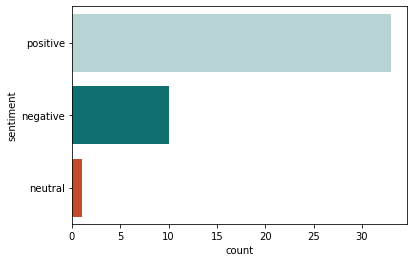

In [54]:
sns.countplot(y='sentiment', 
             data=df_new, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

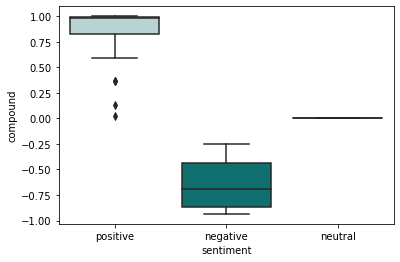

In [55]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df_new);